# Data Project - Stock Market Analysis
Welcome to your second data project! In this portfolio project we will be looking at data from the stock market, particularly some technology stocks. We will learn how to use pandas to get stock information, visualize different aspects of it, and finally we will look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Monte Carlo method!

We'll be answering the following questions along the way:

1. What was the change in price of the stock over time?
2. What was the daily return of the stock on average?
3. What was the moving average of the various stocks?
4. What was the correlation between different stocks' closing prices?
4. What was the correlation between different stocks' daily returns?
5. How much value do we put at risk by investing in a particular stock?
6. How can we attempt to predict future stock behavior?

**Basic Analysis of Stock Information**

In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

In [1]:
#Let's go ahead and start with some imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
from pandas.io.data import DataReader

# For time stamps
from datetime import datetime

# For division
from __future__ import division

/home/jarturomora/anaconda2/lib/python2.7/site-packages/pandas/io/data.py:35: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [2]:
# List of stock symbols to analyse
tech_list = ['AAPL', 'GOOGL', 'MSFT', 'AMZN']

# Analysis dates
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day) # One year after Today

In [3]:
# Create a data frame with the stock information of each symbol.
# I used a dictionary comprehension instead of a foor-loop and global variables as proposed in the course.
symbols = {stock:DataReader(stock, 'yahoo', start, end) for stock in tech_list}

In [4]:
# Accessing stock information about AAPL.
symbols['AAPL'].head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-05-26,132.600006,132.910004,129.119995,129.619995,70697600,127.019145
2015-05-27,130.339996,132.259995,130.050003,132.039993,45833200,129.390586
2015-05-28,131.860001,131.949997,131.100006,131.779999,30733300,129.135808
2015-05-29,131.229996,131.449997,129.899994,130.279999,50884500,127.665906
2015-06-01,130.279999,131.389999,130.050003,130.539993,32112800,127.920684


In [5]:
symbols['AAPL'].describe()

,Open,High,Low,Close,Volume,Adj Close
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000
mean,111.141036,112.198048,109.937809,111.069442,4.814590e+07,109.646184
std,10.995227,10.888842,11.058123,10.937323,2.098057e+07,10.287594
min,90.000000,91.669998,89.470001,90.339996,1.304640e+07,90.339996
25%,102.075001,102.870003,101.165001,102.390000,3.360530e+07,101.522875
50%,111.379997,112.339996,109.900002,111.599998,4.420520e+07,110.068950
75%,118.185001,119.380001,117.229999,118.610001,5.573490e+07,117.084166
max,132.850006,132.970001,131.100006,132.070007,1.622063e+08,129.419998


In [6]:
symbols['AAPL'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2015-05-26 to 2016-05-20
Data columns (total 6 columns):
Open         251 non-null float64
High         251 non-null float64
Low          251 non-null float64
Close        251 non-null float64
Volume       251 non-null int64
Adj Close    251 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


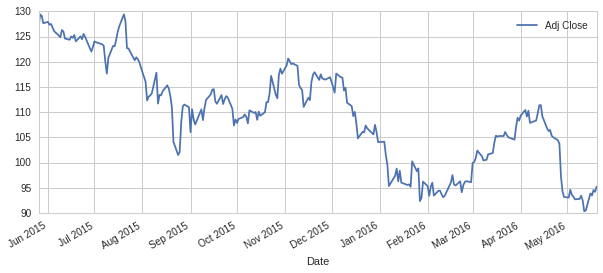

In [7]:
# Quick graphical analysis
symbols['AAPL']['Adj Close'].plot(legend = True, figsize = (10, 4))

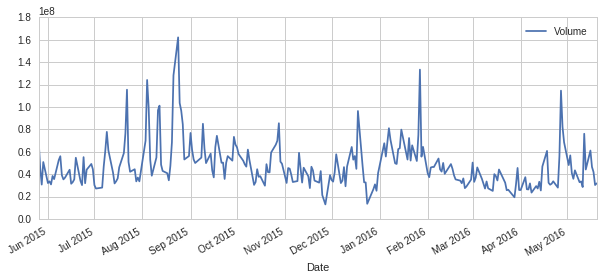

In [8]:
symbols['AAPL']['Volume'].plot(legend = True, figsize = (10, 4))

**Analysis of Moving Averages (MA)**


In [10]:
# We define a list for the moving averages we want to work with
ma_day = [10, 20, 50]

# We will work wit the Apple (APPL) symbol
# We add a new column for each MA
for ma in ma_day:
    column_name = "MA for %s days" % (str(ma))
    # We calculate the "rolling mean" for the series of each MA
    # http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.rolling_mean.html
    symbols["AAPL"][column_name] = pd.rolling_mean(symbols["AAPL"]['Adj Close'], ma)

/home/jarturomora/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:10: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
/home/jarturomora/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:10: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
/home/jarturomora/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:10: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()


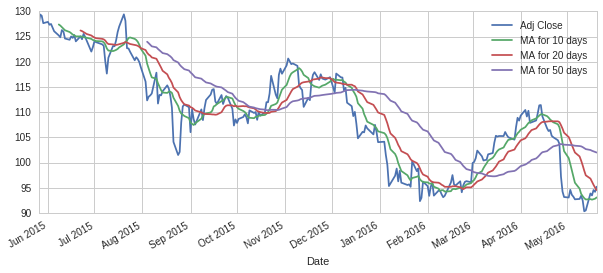

In [12]:
symbols["AAPL"][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(figsize = (10, 4), subplots = False)

**Daily Return**

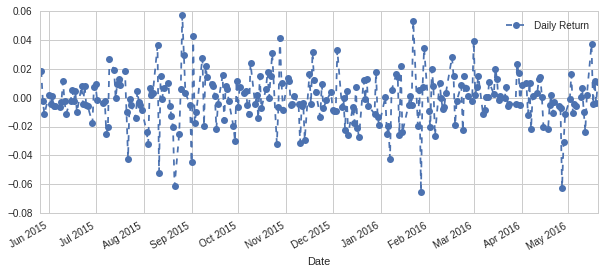

In [14]:
# We add a new column to calculate the daily return of AAPL
symbols['AAPL']['Daily Return'] = symbols['AAPL']['Adj Close'].pct_change()

# Plot of daily return
symbols['AAPL']['Daily Return'].plot(figsize = (10,4), legend = True, linestyle = '--', marker = 'o')

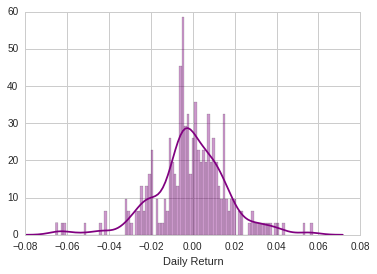

In [16]:
sns.distplot(symbols['AAPL']['Daily Return'].dropna(), bins = 100, color = 'purple')

**Closing Stock Price and Return for Stocks**

In [17]:
# We create a new data frame with the closing information
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

In [18]:
closing_df.head()

,AAPL,AMZN,GOOGL,MSFT
Date,,,,
2015-05-26,127.019145,425.470001,547.190002,45.330101
2015-05-27,129.390586,431.420013,554.250000,46.322518
2015-05-28,129.135808,426.570007,554.179993,46.166845
2015-05-29,127.665906,429.230011,545.320007,45.592800
2015-06-01,127.920684,430.920013,549.210022,45.952793


In [33]:
# Now we create a datafraeme for the return of each stock
tech_rets = closing_df.pct_change()

In [37]:
type(closing_df).__name__

'DataFrame'

In [34]:
tech_rets.head()

,AAPL,AMZN,GOOGL,MSFT
Date,,,,
2015-05-26,NaN,NaN,NaN,NaN
2015-05-27,0.018670,0.013985,0.012902,0.021893
2015-05-28,-0.001969,-0.011242,-0.000126,-0.003361
2015-05-29,-0.011383,0.006236,-0.015988,-0.012434
2015-06-01,0.001996,0.003937,0.007133,0.007896


In [35]:
tech_rets.describe()

,AAPL,AMZN,GOOGL,MSFT
count,250.000000,250.000000,250.000000,250.000000
mean,-0.000995,0.002250,0.001280,0.000586
std,0.017692,0.022047,0.018855,0.017059
min,-0.065707,-0.076100,-0.054141,-0.071710
25%,-0.009224,-0.009334,-0.008309,-0.008973
50%,-0.001165,0.001547,0.001333,0.000877
75%,0.009068,0.012449,0.009138,0.007906
max,0.057355,0.097972,0.162584,0.100770


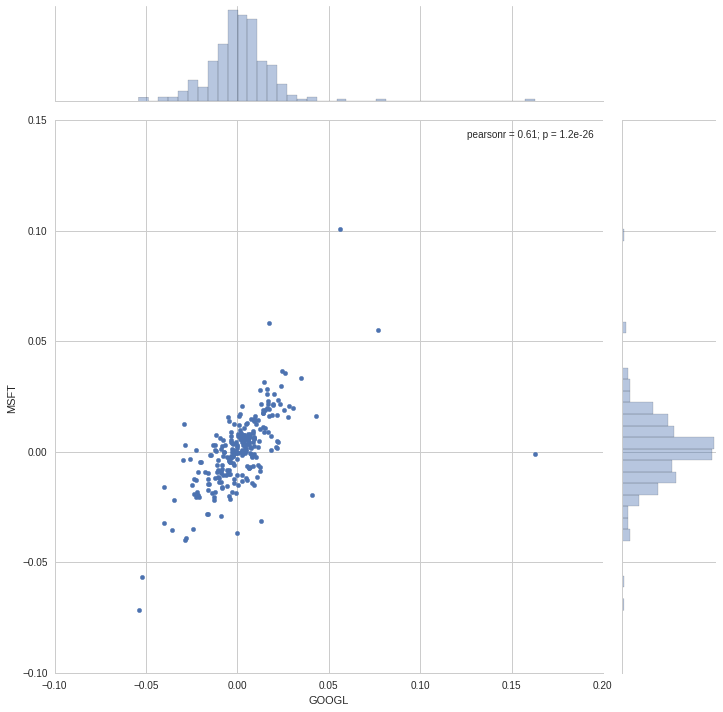

In [40]:
# Comparing return of stock of two companies
sns.jointplot(x = 'GOOGL', y= 'MSFT', data = tech_rets, kind = 'scatter', size = 10)

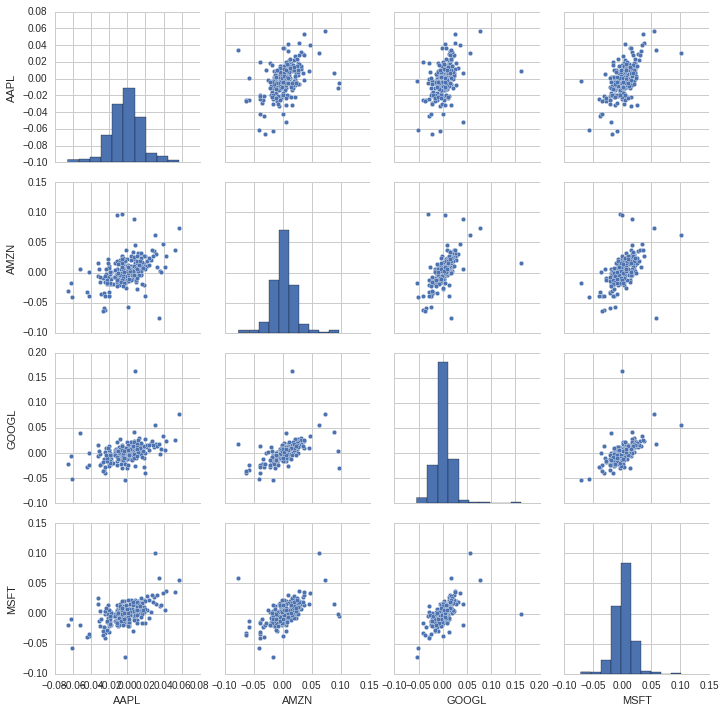

In [41]:
# Analysing correlation between all companies
sns.pairplot(tech_rets.dropna())

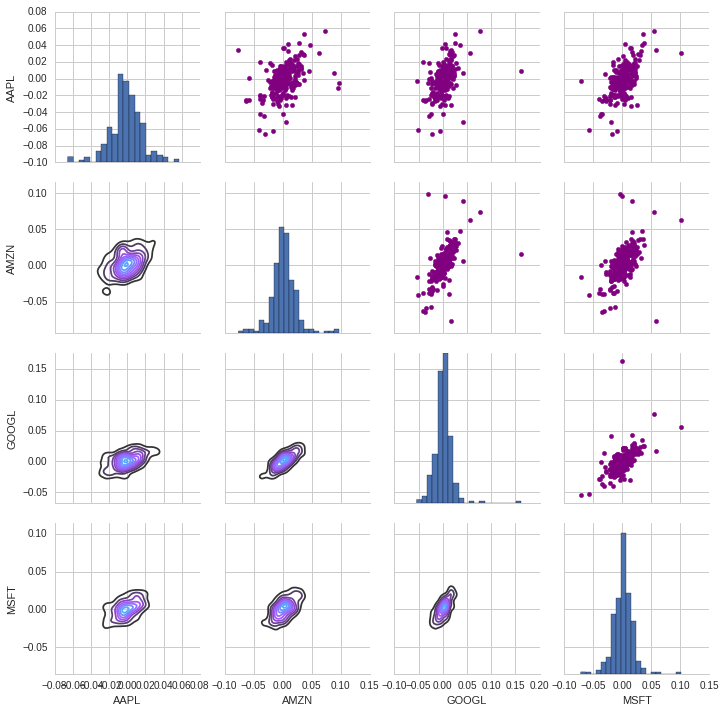

In [42]:
# Creating a personalized pair plot
returns_fig = sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter, color = 'purple') # The upper plots
returns_fig.map_lower(sns.kdeplot, cmap = 'cool_d') # The lower plots
returns_fig.map_diag(plt.hist, bins = 20) # The diagonal plot

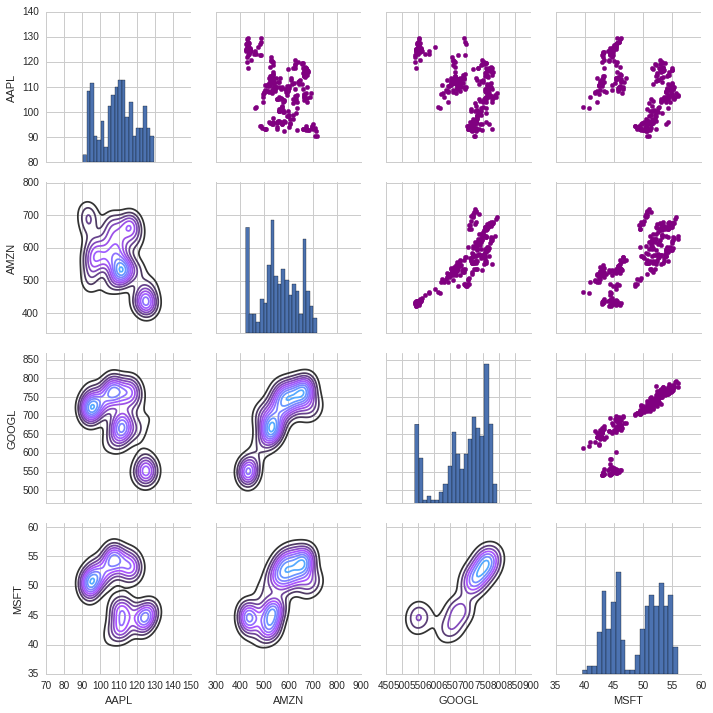

In [43]:
returns_fig = sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter, color = 'purple') # The upper plots
returns_fig.map_lower(sns.kdeplot, cmap = 'cool_d') # The lower plots
returns_fig.map_diag(plt.hist, bins = 20) # The diagonal plot

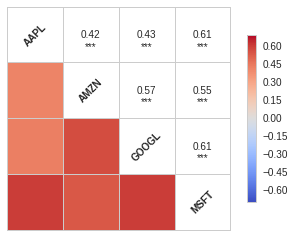

In [47]:
sns.corrplot(tech_rets.dropna(), annot = True)

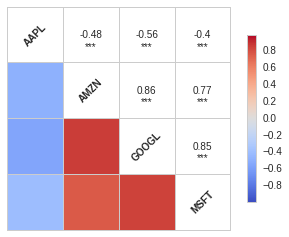

In [48]:
sns.corrplot(closing_df)